<center>

# ECE 60146 Homework 1 

## Dan Mani Binu

### January 2025

<center>

### 2.1 Creating the Base Class


In [125]:
import math
class SignalProcessor ( object ):
    def __init__ ( self , data ):
        self . data = data
    

### 2.2 Creating the Sine Wave Function

*super()* helps initialize data through the parent class, while *amplitude* and *frequency* are local to the child class and updated within its *__init__*

In [126]:
class SineWaveFunction ( SignalProcessor ):
    def __init__ ( self , amplitude , frequency ):
        super () . __init__ ([])
        self . amplitude = amplitude
        self . frequency = frequency
    
    

### 2.3 Making Objects Callable

The *_call_* function is invoked when the class name is used with the call operator *()*

In [127]:
    def __call__(self,duration):
        self.data = []
        for i in range(duration):
            self.data.append(self.amplitude * math.sin(2*math.pi*self.frequency*i))
        print(f"Sine wave data:{self.data}")
    
    def __len__(self):
        return len(self.data)
    
    
    


### 2.4 Making Objects Iterable

The __iter__ method resets the index to zero and returns the object itself, satisfying the iterator protocol. The __next__ method retrieves the current value, advances the index, and raises StopIteration when the list is exhausted

In [128]:
    def __iter__(self):
        self.index = 0 
        return self
    
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
        current_value = self.data[self.index]
        self.index += 1
        return current_value
    
    

### 2.6 Comparing Signals

The *eq* function here checks first whether the number of samples in *data* for both the signals are the same. If not it checks for the number of signals that are same with a tolerance of 0.01.

In [129]:
    def __eq__(self,b):
        count = 0
        if len(self.data) != len(b.data):
            raise ValueError("Two signals are not equal in length")
        else:
            for i in range(len(self.data)):
                if abs(self.data[i]-b.data[i])<0.01:
                    count += 1
            return count

In [130]:
class SineWaveFunction ( SignalProcessor ):
    def __init__ ( self , amplitude , frequency ):
        super () . __init__ ([])
        self . amplitude = amplitude
        self . frequency = frequency
    def __call__(self,duration):
        self.data = []
        for i in range(duration):
            self.data.append(self.amplitude * math.sin(2*math.pi*self.frequency*i))
        print(f"Sine wave data:{self.data}")
    
    def __len__(self):
        return len(self.data)
    
    def __iter__(self):
        self.index = 0 
        return self
    
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
        current_value = self.data[self.index]
        self.index += 1
        return current_value
    
    def __eq__(self,b):
        count = 0
        if len(self.data) != len(b.data):
            raise ValueError("Two signals are not equal in length")
        else:
            for i in range(len(self.data)):
                if abs(self.data[i]-b.data[i])<0.01:
                    count += 1
            return count

### 2.5 Square Wave Function:

*SquareWaveFunction* would inherit from *SineWaveFunction* as both of them have *amplitude*, *frequency* and *data* values.
The data values generated from *SineWaveFunction* are then used to reinitialize data values for *SquareWaveFunction*

In [131]:
class SquareWaveFunction ( SineWaveFunction ):
    def __init__ ( self , amplitude , frequency ):
        super (SquareWaveFunction,self) . __init__ ( 1 , frequency )
        self . amplitude = amplitude
    
    def __call__(self,duration):
        super(). __call__(duration)
        for i in range(len(self.data)):
            if self.data[i] >= 0:
                self.data[i] = self.amplitude
            else:
                self.data[i] = -self.amplitude
        print(f"Square wave data:{self.data}")
    

### 2.7 Demonstration:

![alt text](image.png)


In [132]:
SG = SineWaveFunction(amplitude =1.0 ,frequency =1)
SG (duration = 5)
SG = SquareWaveFunction(amplitude =3.0 ,frequency =1)
SG (duration = 5)


Sine wave data:[0.0, -2.4492935982947064e-16, -4.898587196589413e-16, -7.347880794884119e-16, -9.797174393178826e-16]
Sine wave data:[0.0, -7.347880794884119e-16, -1.4695761589768238e-15, -2.204364238465236e-15, -2.9391523179536475e-15]
Square wave data:[3.0, -3.0, -3.0, -3.0, -3.0]


![alt text](image-1.png)

In [133]:
SG = SineWaveFunction(amplitude=1.0, frequency=1.1)
SG(duration=10)
SG = SineWaveFunction(amplitude=1.0, frequency=0.1)
SG(duration=10)

Sine wave data:[0.0, 0.5877852522924736, 0.951056516295154, 0.9510565162951528, 0.5877852522924711, -2.2056021997384123e-15, -0.5877852522924776, -0.9510565162951541, -0.9510565162951521, -0.5877852522924665]
Sine wave data:[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732, 1.2246467991473532e-16, -0.587785252292473, -0.9510565162951535, -0.9510565162951536, -0.5877852522924734]


### 3.1 Composite signal function

Here, we define a class to handle signal addition. 

The CompositeSignalFunction accepts a list of other signal objects (like sine or square waves) and sums them up. 

The __call__ method handles the logic in two steps: first, it ensures all input waves are generated for the given duration, and then it accumulates their values into a single data list to create the composite output.

In [134]:
class CompositeSignalFunction ( SignalProcessor ):
    def __init__ ( self , inputs ):
        super () . __init__ ([])
        self.inputs = inputs
    
    def __call__(self,duration):
        self.data = [0]*duration
        for waves in self.inputs:
            waves(duration)
        for i in range(duration):
            for waves in self.inputs:
                self.data[i]+=waves.data[i]
        print(f"Composite signal data:{self.data}")

In [135]:
SG = SineWaveFunction ( amplitude = 1.0 , frequency = 0.1)
SW = SquareWaveFunction ( amplitude = 0.5 , frequency = 0.05)
CSG = CompositeSignalFunction ( inputs = [ SG , SW ] )
CSG ( duration = 10 )

Sine wave data:[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732, 1.2246467991473532e-16, -0.587785252292473, -0.9510565162951535, -0.9510565162951536, -0.5877852522924734]
Sine wave data:[0.0, 0.1545084971874737, 0.29389262614623657, 0.4045084971874737, 0.47552825814757677, 0.5, 0.4755282581475768, 0.4045084971874737, 0.2938926261462366, 0.15450849718747375]
Square wave data:[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Composite signal data:[0.5, 1.0877852522924731, 1.4510565162951536, 1.4510565162951536, 1.0877852522924734, 0.5000000000000001, -0.08778525229247303, -0.45105651629515353, -0.45105651629515364, -0.08778525229247336]


### 3.2 Signal Visualization

The following code creates a visualization for all the signals generated, step by step, in code cells:

First we generate all three signals for a duration of 80 timesteps

In [136]:
SG = SineWaveFunction ( amplitude = 1.0 , frequency = 0.1)
SW = SquareWaveFunction ( amplitude = 0.5 , frequency = 0.05)
CSG = CompositeSignalFunction ( inputs = [ SG , SW ] )
CSG ( duration = 80 )


Sine wave data:[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732, 1.2246467991473532e-16, -0.587785252292473, -0.9510565162951535, -0.9510565162951536, -0.5877852522924734, -2.4492935982947064e-16, 0.5877852522924729, 0.9510565162951535, 0.9510565162951536, 0.5877852522924734, 3.6739403974420594e-16, -0.5877852522924728, -0.9510565162951534, -0.9510565162951538, -0.5877852522924735, -4.898587196589413e-16, 0.5877852522924727, 0.9510565162951534, 0.9510565162951538, 0.5877852522924736, 6.123233995736766e-16, -0.5877852522924726, -0.9510565162951534, -0.9510565162951538, -0.5877852522924737, -7.347880794884119e-16, 0.5877852522924725, 0.9510565162951533, 0.9510565162951539, 0.5877852522924738, 8.572527594031472e-16, -0.5877852522924725, -0.9510565162951533, -0.9510565162951539, -0.5877852522924739, -9.797174393178826e-16, 0.5877852522924724, 0.9510565162951533, 0.9510565162951539, 0.587785252292474, 1.102182119232618e-15, -0.5877852522924722, -0.9510565

This helper function simplifies the process of converting our time-domain signals into the frequency domain. It uses 

numpy.fft.fft to compute the raw Fourier Transform. Since the FFT output for real-valued signals is symmetric (the second half 

is a mirror of the first), we slice the array to keep only the first half (positive frequencies) and calculate the absolute 

magnitude to make it ready for plotting.

In [137]:
def get_fft_spectrum(signal_data):
    fft_vals = np.fft.fft(signal_data)
    # We only need the first half (positive frequencies)
    half_n = len(signal_data) // 2
    magnitude = np.abs(fft_vals)[:half_n]
    return magnitude

We now create a canvas for two plots in matplotlib, one for the time domain analysis and the other for frequency domain analysis.

In this step, we compute the FFT magnitude for the sine, square, and composite signals using our helper function. We then plot these spectrums against a normalized frequency axis (ranging from 0 to 0.5). This visualization allows us to clearly observe the fundamental frequency in the sine wave, the odd harmonics inherent in the square wave, and how these components stack together in the composite signal.

The waves are plotted with distinct colors

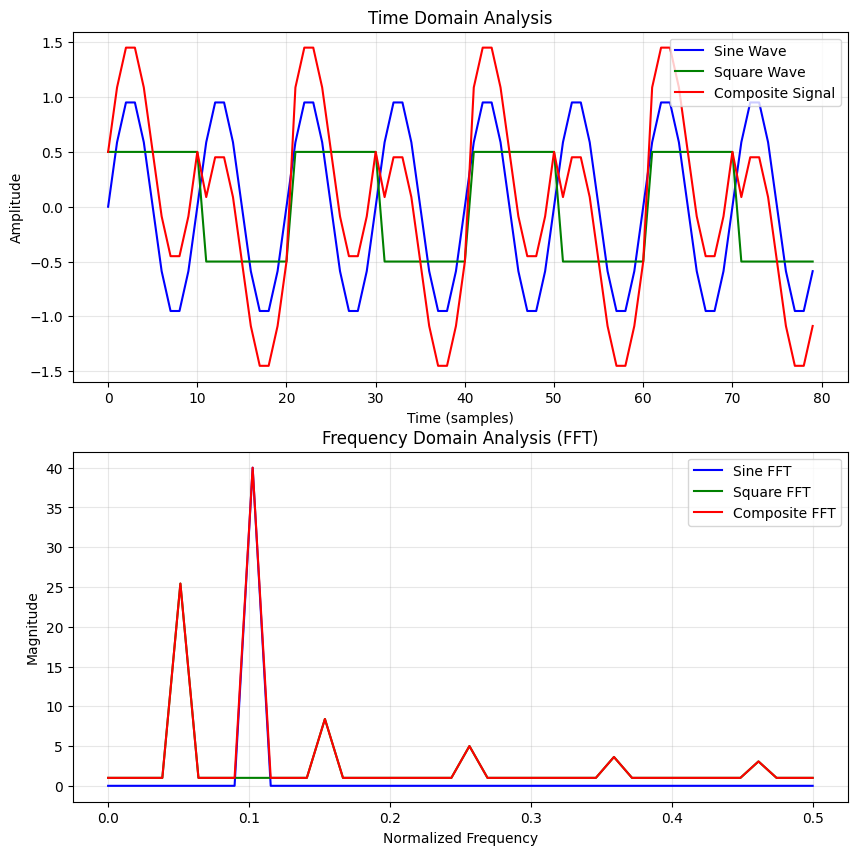

In [138]:
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

time_axis = range(80)

ax1.plot(time_axis, SG.data, label='Sine Wave', color='blue')
ax1.plot(time_axis, SW.data, label='Square Wave', color='green')
ax1.plot(time_axis, CSG.data, label='Composite Signal', color='red')

ax1.set_title('Time Domain Analysis')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Amplitude')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)


fft_sine = get_fft_spectrum(SG.data)
fft_square = get_fft_spectrum(SW.data)
fft_composite = get_fft_spectrum(CSG.data)

# Create frequency axis (Normalized Frequency 0 to 0.5)
freqs = np.linspace(0, 0.5, len(fft_sine))

ax2.plot(freqs, fft_sine, label='Sine FFT', color='blue')
ax2.plot(freqs, fft_square, label='Square FFT', color='green')
ax2.plot(freqs, fft_composite, label='Composite FFT', color='red')

ax2.set_title('Frequency Domain Analysis (FFT)')
ax2.set_xlabel('Normalized Frequency')
ax2.set_ylabel('Magnitude')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.show()

#### Time Domain (Top Plot): 

This graph shows the application of the principle of superposition. The Composite Signal (Red) is simply the sum of the Sine 

(Blue) wave and the Square (Green) wave. It can clearly be noticed that the red graph maintains the sinus nature of the sine 

wave. However, it is displaced upwards or downwards depending on the state of the square wave.

#### Frequency Domain (Bottom Plot): 

The following graph shows what the signals look like in terms of their frequency components.

The large red spike (around 0.1) corresponds to the fundamental, common to all three signals.

The Sine Wave (Blue) is a pure wave and therefore has one spike and no harmonics.

## Codebase

In [139]:
import math

class SignalProcessor ( object ):
    def __init__ ( self , data ):
        self . data = data

class SineWaveFunction ( SignalProcessor ):
    def __init__ ( self , amplitude , frequency ):
        super () . __init__ ([])
        self . amplitude = amplitude
        self . frequency = frequency
    def __call__(self,duration):
        self.data = []
        for i in range(duration):
            self.data.append(self.amplitude * math.sin(2*math.pi*self.frequency*i))
        print(f"Sine wave data:{self.data}")
    
    def __len__(self):
        return len(self.data)
    
    def __iter__(self):
        self.index = 0 
        return self
    
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
        current_value = self.data[self.index]
        self.index += 1
        return current_value
    
    def __eq__(self,b):
        count = 0
        if len(self.data) != len(b.data):
            raise ValueError("Two signals are not equal in length")
        else:
            for i in range(len(self.data)):
                if abs(self.data[i]-b.data[i])<0.01:
                    count += 1
            return count

class SquareWaveFunction ( SineWaveFunction ):
    def __init__ ( self , amplitude , frequency ):
        super (SquareWaveFunction,self) . __init__ ( 1 , frequency )
        self . amplitude = amplitude
    
    def __call__(self,duration):
        super(). __call__(duration)
        for i in range(len(self.data)):
            if self.data[i] >= 0:
                self.data[i] = self.amplitude
            else:
                self.data[i] = -self.amplitude
        print(f"Square wave data:{self.data}")
    


In [140]:
SG1 = SineWaveFunction(amplitude =2.0 ,frequency =0.1)
SG1 (duration = 5)

Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]


In [141]:
SG = SineWaveFunction(amplitude =2.0 ,frequency =0.1)
SG ( duration =5 ) # Create and print the sine wave
print (len( SG ) )

Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
5


In [142]:
SG = SineWaveFunction(amplitude =2.0 ,frequency =0.1)
SG(duration =5 )
print([val for val in SG]) 

Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]


In [143]:
SW = SquareWaveFunction(amplitude =3.0 , frequency =0.1)
SW(duration =5 )
print(len( SW ) ) # Output : 5
print([val for val in SW]) 

Sine wave data:[0.0, 1.7633557568774194, 2.8531695488854605, 2.853169548885461, 1.7633557568774196]
Square wave data:[3.0, 3.0, 3.0, 3.0, 3.0]
5
[3.0, 3.0, 3.0, 3.0, 3.0]


In [144]:
SG1 = SineWaveFunction (amplitude =2.0 , frequency =0.1)
SG1 (duration =5)
SG2 = SineWaveFunction ( amplitude =2.0 , frequency =0.15 )
SG2 ( duration =5 )
print ( SG1 == SG2 ) # Output : number of matching elements
SG3 = SineWaveFunction ( amplitude =2.0 , frequency =0.1 )
SG3(duration =3)
print(SG1 == SG3) 

Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
Sine wave data:[0.0, 1.618033988749895, 1.9021130325903073, 0.618033988749895, -1.175570504584946]
2
Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307]


ValueError: Two signals are not equal in length

### Bonus Section

Sine wave data:[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732, 1.2246467991473532e-16, -0.587785252292473, -0.9510565162951535, -0.9510565162951536, -0.5877852522924734, -2.4492935982947064e-16, 0.5877852522924729, 0.9510565162951535, 0.9510565162951536, 0.5877852522924734, 3.6739403974420594e-16, -0.5877852522924728, -0.9510565162951534, -0.9510565162951538, -0.5877852522924735, -4.898587196589413e-16, 0.5877852522924727, 0.9510565162951534, 0.9510565162951538, 0.5877852522924736, 6.123233995736766e-16, -0.5877852522924726, -0.9510565162951534, -0.9510565162951538, -0.5877852522924737, -7.347880794884119e-16, 0.5877852522924725, 0.9510565162951533, 0.9510565162951539, 0.5877852522924738, 8.572527594031472e-16, -0.5877852522924725, -0.9510565162951533, -0.9510565162951539, -0.5877852522924739, -9.797174393178826e-16, 0.5877852522924724, 0.9510565162951533, 0.9510565162951539, 0.587785252292474, 1.102182119232618e-15, -0.5877852522924722, -0.9510565

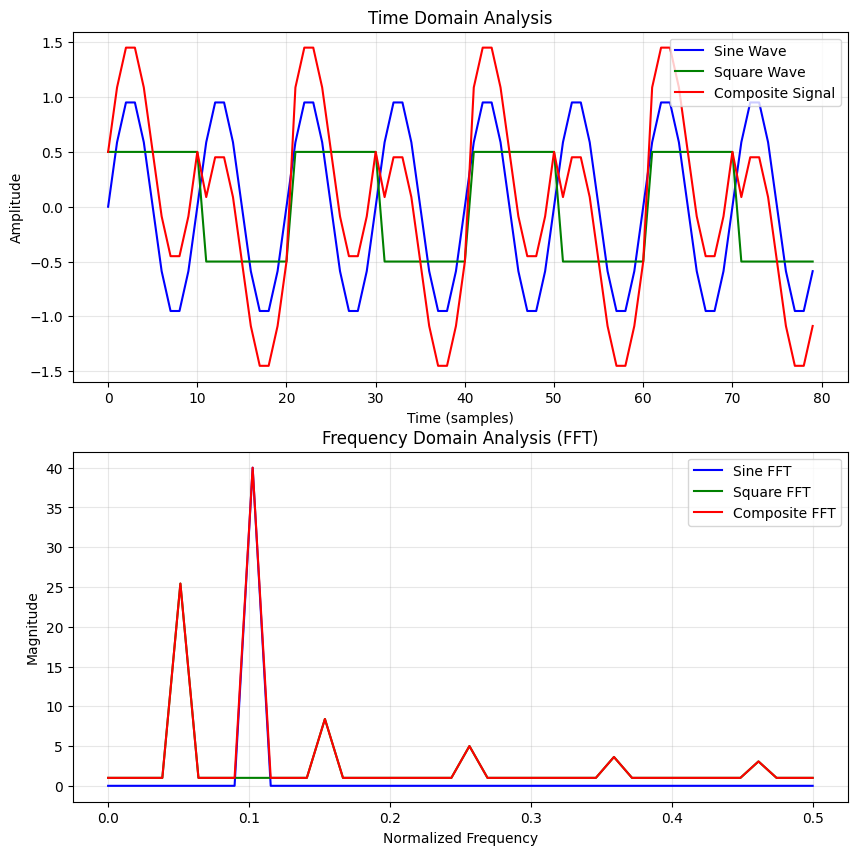

In [145]:
SG = SineWaveFunction ( amplitude = 1.0 , frequency = 0.1)
SW = SquareWaveFunction ( amplitude = 0.5 , frequency = 0.05)
CSG = CompositeSignalFunction ( inputs = [ SG , SW ] )
CSG ( duration = 80 )

def get_fft_spectrum(signal_data):
    fft_vals = np.fft.fft(signal_data)
    # We only need the first half (positive frequencies)
    half_n = len(signal_data) // 2
    magnitude = np.abs(fft_vals)[:half_n]
    return magnitude

import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

time_axis = range(80)

ax1.plot(time_axis, SG.data, label='Sine Wave', color='blue')
ax1.plot(time_axis, SW.data, label='Square Wave', color='green')
ax1.plot(time_axis, CSG.data, label='Composite Signal', color='red')

ax1.set_title('Time Domain Analysis')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Amplitude')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)


fft_sine = get_fft_spectrum(SG.data)
fft_square = get_fft_spectrum(SW.data)
fft_composite = get_fft_spectrum(CSG.data)

# Create frequency axis (Normalized Frequency 0 to 0.5)
freqs = np.linspace(0, 0.5, len(fft_sine))

ax2.plot(freqs, fft_sine, label='Sine FFT', color='blue')
ax2.plot(freqs, fft_square, label='Square FFT', color='green')
ax2.plot(freqs, fft_composite, label='Composite FFT', color='red')

ax2.set_title('Frequency Domain Analysis (FFT)')
ax2.set_xlabel('Normalized Frequency')
ax2.set_ylabel('Magnitude')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.show()